# Chapitre III - jeux de données IMDB
jeux de données contenant des critiques de films hautement polarisée.

caractéristiques principales:
- taille : 50 000 observations
- train/test : 50/50
- équilibré = 50/50

Objectif : prédiction binaire positive/négative à partir des critiques => NLP*

## Importation du jeux de données et des librairies

on importera ici seulement les 10000 mots les plus fréquents afin d'éviter de surcharger la mémoire pendant l'apprentissage. (Surtout que je n'ai pas de GPU sur ce PC portable)

In [157]:
from keras.datasets import imdb
%matplotlib inline

(train_data, train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

print("la taille du jeux de données d'entrainement est de {}, avec une dimension de {}".format(train_data.shape,train_data.ndim))
print(train_labels[1:10])

la taille du jeux de données d'entrainement est de (25000,), avec une dimension de 1
[0 0 1 0 0 1 0 1 0]


le jeux de données d'entrainement consiste en des vecteurs de mots décrits par leur code respectif dans un dictionnaire. La méthode ```get_word_index()``` de imdb permet d'accéder à ces mots :

In [158]:
print("la valeur max est de " + str(max([max(vecteur) for vecteur in train_data]))) # la valeur max est 9999 

word_index = imdb.get_word_index() #méthode de keras pour imdb uniquement permettant d'accéder au paires mots/indices
reverse_word_index = dict([(v,k) for (k,v) in word_index.items()]) #inversion du dico  indices/mots

' '.join([reverse_word_index.get(i-3,"?") for i in train_data[0]]) #la fonction join permet une jointure entre les mots, la méthode get permet d'accéder à la valeur de la clef correspondantes

la valeur max est de 9999


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

indice de 0 à 2 correspondents à des indices spécifiques signifiant : "remplissage", "début de séquence", "mot inconnu"

## Préparation des données

- les données d'entrées dans un réseaux de neurone dans keras est un tenseurs ! pas d'integer
- la forme de chaque tenseur est identique
- one hot encoding très bien pour ce genre de situation ; on transforme en binaire et en float32

In [164]:
import numpy as np

def vectorize_sequence(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results

X_train = vectorize_sequence(train_data)
X_test = vectorize_sequence(test_data)

y_train = np.asarray(train_labels).astype(float)
y_test = np.asarray(test_labels).astype(float)

## Architecture du réseau

- combien de couche ?
- combien d'unités sur chaque couche ? 
--> détermine la complexité, le degré de liberté du modèle, intuitivement plus l'apprentissage est complexe, en grande dimension plus ces hyperparamètres devront être élevé

On part sur trois couches ici : entrée, cachée, sortie avec 16 neurones sur les couches intermédiaires

In [160]:
from keras import layers
from keras import models

# architecture du réseau en trois couches avec un sortie en binaire
model = models.Sequential()
model.add(layers.Dense(16,activation = "relu", input_shape=(10000,)))
model.add(layers.Dense(16,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))

# compilation du model : optimiseur, fonction de perte, métriques à suivre
model.compile(optimizer= "rmsprop",
             loss = "binary_crossentropy",
             metrics = ["accuracy"])


### configuration de l'optimiseur, loss et metric

On peut gérer les [optimiseurs et autres](https://keras.io/api/optimizers/) avec l'API de keras

In [161]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss = "binary_crossentropy",
             metrics = ["accuracy"])

from keras import losses
from keras import metrics

model.compile(optimizer = optimizers.RMSprop(lr=0.001),
             loss = losses.binary_crossentropy,
             metrics = metrics.binary_accuracy)

## Préparation d'un jeux de données test et d'apprentissage

l'objectif est de pouvoir tester notre apprentissage sans passer par le vrai jeux de données de test mais en en créant un nouveau à partir des données d'apprentissage. Il est important ici de connaitre l'équilibrage des labels pour spliter de manière à avoir le même équilibre dans chacun des nouveaux jeux de données train et test afin qu'ils soient tout deux représentatifs l'un de l'autre. Ici on se fait pas chier étant données que les données sont équilibré avec un problème binaire en plus.



In [73]:
x_val = X_train[:10000,:]
partial_x_val = X_train[10000:]

y_val = y_train[:10000]
partial_y_val = y_train[10000:]

(x_val == X_train[:10000]).all() # équivalence des écritures

True

## Entrainement du modele

In [74]:
model.compile(optimizer = "rmsprop",
             loss = "binary_crossentropy",
             metrics = ["accuracy","AUC"])

history = model.fit(partial_x_val,
                    partial_y_val,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 57ms/step - loss: 0.5398 - accuracy: 0.7755 - auc: 0.8733 - val_loss: 0.4235 - val_accuracy: 0.8616 - val_auc: 0.9391
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3392 - accuracy: 0.9001 - auc: 0.9602 - val_loss: 0.3233 - val_accuracy: 0.8868 - val_auc: 0.9516
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2474 - accuracy: 0.9247 - auc: 0.9749 - val_loss: 0.2862 - val_accuracy: 0.8930 - val_auc: 0.9546
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1934 - accuracy: 0.9386 - auc: 0.9837 - val_loss: 0.2756 - val_accuracy: 0.8915 - val_auc: 0.9550
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1585 - accuracy: 0.9489 - auc: 0.9883 - val_loss: 0.2752 - val_accuracy: 0.8897 - val_auc: 0.9544
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1276 - accuracy: 0.9615 - auc: 0.9928 - val_loss: 0.2826 - v

En suivant le model de visu on peut déjà voir un surapprentissage très rapidement. Cependant le model semble bien efficace pour la classification dans ce cas. 
Le modele fité contient un attribut history qui permet d'accéder à tout ce qui s'est passé pendant l'entrainment et notamment de pouvoir visualiser les courbes d'apprentissage.

In [178]:

from IPython.core.display import HTML

HTML("""
<style>
 {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

dict_keys(['loss', 'accuracy', 'auc', 'val_loss', 'val_accuracy', 'val_auc'])


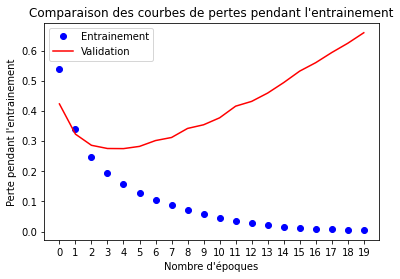

In [179]:
import matplotlib.pyplot as plt

print(history.history.keys())

history_dict = history.history
loss = history_dict.get('loss')
val_loss_values = history_dict["val_loss"]
epochs = range(20)

plt.plot(epochs,loss,marker="o", linestyle = "none",color = "blue", label = "Entrainement")
plt.plot(epochs,val_loss_values,color="red",label = "Validation")

plt.xticks(np.arange(0,20))

plt.title("Comparaison des courbes de pertes pendant l'entrainement")

plt.xlabel("Nombre d'époques")
plt.ylabel("Perte pendant l'entrainement")

plt.legend()
plt.show()



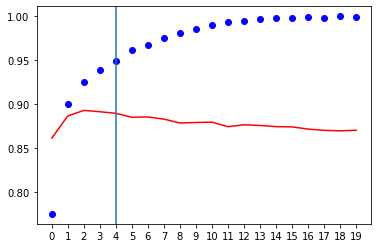

In [142]:
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.clf()
plt.plot(epochs,acc,linestyle="none",color = "blue", marker = "o",label="Entrainement")
plt.plot(epochs,val_acc,color = "red",label="validation")
plt.xticks(np.arange(0,20))
plt.axvline(4)
plt.show()

## Nouveau réseau pour le surajustement
L'objectif est d'arrêter l'apprentissage à 4 là ou le réseaux prédit le mieux pour les données d'apprentissage pour éviter le surajustement

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16,activation="relu",input_shape=(10000,)))
model.add(layers.Dense(16,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))

model.compile(optimizer = "rmsprop",
             loss = "binary_crossentropy",
             metrics = ["accuracy"])

model.fit(X_train,
          y_train,
          epochs = 4,
          batch_size = 512)

results = model.evaluate(X_test,y_test)

print(results)

## Utilisation du réseau pré entrainé pour générer des prédictions

une fois notre réseau entrainé il permet d'être utiliser pour réaliser des prédicitons sur des données non encore rencontré, ici juste les données test

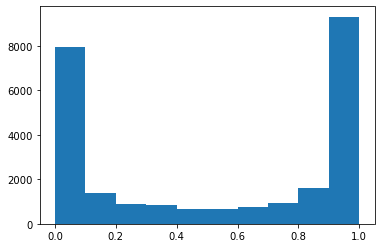

In [169]:
proba_test = model.predict(X_test)
plt.hist(proba_test)
plt.show()

on peut voir sur l'histogramme que le réseaux est sur pour la majorité des étiquettes avec une bonne polarisation entre des proba proches de 0 et de 1

## test d'un réseau plus simple 
l'objectif est de voir le comportement du réseaux avec une seule couche de neurone

In [251]:
model = models.Sequential()
model.add(layers.Dense(32,activation="tanh",input_shape=(10000,)))
model.add(layers.Dense(1,activation="sigmoid"))

model.compile(optimizer="adam",
             loss = "binary_crossentropy",
             metrics = ["accuracy"])
model.fit(X_train,
          y_train,
          epochs=3,
          batch_size=512,
          validation_data = (X_test,y_test))


Epoch 1/3
49/49 [==============================] - 16s 331ms/step - loss: 0.4232 - accuracy: 0.8328 - val_loss: 0.3215 - val_accuracy: 0.8786
Epoch 2/3
49/49 [==============================] - 2s 40ms/step - loss: 0.2401 - accuracy: 0.9169 - val_loss: 0.2858 - val_accuracy: 0.8869
Epoch 3/3
49/49 [==============================] - 2s 31ms/step - loss: 0.1859 - accuracy: 0.9366 - val_loss: 0.2880 - val_accuracy: 0.8826


In [213]:
model.evaluate(X_test,y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.2843 - accuracy: 0.8878


[0.28434282541275024, 0.8878399729728699]

In [203]:
history = model.history.history
epochs = range(10)
acc = history["accuracy"]
val_acc = history["val_accuracy"]

plt.plot(epochs,acc,marker="o",linestyle="none",color="blue")
plt.plot(epochs,val_acc)

KeyError: 'accuracy'

In [249]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

param = {"l1_ratio":np.logspace(-4,0)}

reglog = LogisticRegression(penalty="l1",
                            solver = 'saga')

grid = GridSearchCV(reglog,
                    param,
                    cv=5)

grid.fit(X_train[:400,:10],y_train[:400])





C:\Users\marec\miniconda3\envs\deeplwithpython\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\marec\miniconda3\envs\deeplwithpython\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\marec\miniconda3\envs\deeplwithpython\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\marec\miniconda3\envs\deeplwithpython\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\marec\miniconda3\envs\deeplwithpyth

GridSearchCV(cv=5,
             estimator=LogisticRegression(penalty='elasticnet', solver='saga'),
             param_grid={'l1_ratio': array([1.00000000e-04, 1.20679264e-04, 1.45634848e-04, 1.75751062e-04,
       2.12095089e-04, 2.55954792e-04, 3.08884360e-04, 3.72759372e-04,
       4.49843267e-04, 5.42867544e-04, 6.55128557e-04, 7.90604321e-04,
       9.54095476e-04, 1.15139540e-03, 1.38949549e-03, 1.67683294e-...
       9.10298178e-03, 1.09854114e-02, 1.32571137e-02, 1.59985872e-02,
       1.93069773e-02, 2.32995181e-02, 2.81176870e-02, 3.39322177e-02,
       4.09491506e-02, 4.94171336e-02, 5.96362332e-02, 7.19685673e-02,
       8.68511374e-02, 1.04811313e-01, 1.26485522e-01, 1.52641797e-01,
       1.84206997e-01, 2.22299648e-01, 2.68269580e-01, 3.23745754e-01,
       3.90693994e-01, 4.71486636e-01, 5.68986603e-01, 6.86648845e-01,
       8.28642773e-01, 1.00000000e+00])})

In [243]:
y_train.reshape((-1,1))

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]])